In [1]:
import pandas as pd
df_train = pd.read_csv("data/titanic_train.csv")
df_test = pd.read_csv("data/titanic_test.csv")

In [ ]:
df_train.info()  #916

In [3]:
df_test.info() #393

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


In [ ]:
#df_train 데이터에서 생존여부를 그래프로 출력하기
df_train["survived"].value_counts().plot.bar()
df_train["survived"].value_counts()

In [ ]:
df_train["survived"].value_counts().plot(kind="bar")

In [8]:
#좌석등급(pclass)별 생존여부(survived) 조회하기
df_train[["pclass","survived"]].value_counts()
df_train.groupby("pclass")["survived"].value_counts()

pclass  survived
1       1           142
        0            88
2       0           106
        1            82
3       0           369
        1           129
Name: count, dtype: int64

In [ ]:
#좌석등급(pclass)별 생존여부(survived) 정렬하여 조회하기
#df_train[["pclass","survived"]].value_counts().sort_index()
df_train.groupby("pclass")["survived"].value_counts().sort_index()

In [ ]:
df_train.groupby("pclass")["survived"].value_counts().sort_index().\
    plot(kind="bar")

In [ ]:
import seaborn as sns
#countplot : pclass의 값의 빈도값을 y축의 값으로 설정
#sns.countplot(x="pclass",data=df_train)
#hue="survived" : survived 컬럼으로 분리한 건수 y축의값으로 설정
sns.countplot(x="pclass",hue="survived",data=df_train)

In [ ]:
df_train.info()

In [16]:
#1. age 결측값을 df_train 평균값으로 df_train,df_test 변경하기
age_mean = df_train["age"].mean()
df_train["age"] = df_train["age"].fillna(age_mean)
df_test["age"] = df_test["age"].fillna(age_mean)

In [ ]:
df_train.info()
#df_test.info()

In [20]:
#2. embarked 컬럼의 결측값을 최빈값을 변경하기
embarked_freq = df_train["embarked"].value_counts().idxmax()
df_train["embarked"] = df_train["embarked"].fillna(embarked_freq)
df_test["embarked"] = df_test["embarked"].fillna(embarked_freq)

    titanic 속성
pclass : Passenger Class, 승객 등급
survived : 생존 여부
name : 승객 이름
sex : 승객 성별
age : 승객 나이
sibsp : 탑승 한 형제/배우자 수
parch : 탑승 한 부모/자녀 수
ticket : 티켓 번호
fare : 승객 지불 요금
cabin : 선실 이름
embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
body : 사망자 확인 번호
home.dest : 고향/목적지

In [23]:
#name,ticket,cabin,body,home.dest 컬럼 제거하기
df_train = df_train.drop(["name","ticket","cabin","body","home.dest"],axis=1)
df_test = df_test.drop(["name","ticket","cabin","body","home.dest"],axis=1)

In [ ]:
#df_train,df_test 데이터를 통합하기
#whole_df = df_train.append(df_test) #
whole_df = pd.concat((df_train,df_test),sort=False)
whole_df.info()
train_num = len(df_train)
train_num  #훈련데이터건수. 

In [ ]:
#원핫인코딩
whole_df_encoded = pd.get_dummies(whole_df,dtype="int")
whole_df_encoded.info()

In [35]:
#훈련데이터의 설명변수
x_train = df_train.loc[:,df_train.columns!="survived"].values
#훈련데이터의 목표변수
y_train = df_train["survived"].values

In [38]:
#테스트데이터의 설명변수
x_test = df_test.loc[:,df_test.columns!="survived"].values
#테스트데이터의 목표변수
y_test = df_test["survived"].values

In [ ]:
#로지스틱회귀분석을 이용하여 분류하기
#로지스틱회귀분석 은 0~1사이의 값만 리턴
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train) #학습하기

In [40]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred[:10]

In [ ]:
y_test[:10]

In [43]:
#모델 평가하기
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
con_mat


array([[214,  32],
       [ 48,  99]], dtype=int64)

In [44]:
#2. 정확도, 정밀도,재현율,f1score 출력
from sklearn.metrics import accuracy_score,\
    recall_score,precision_score,f1_score
print("정확도:",accuracy_score(y_test,y_pred))
print("정밀도:",precision_score(y_test,y_pred))
print("재현율:",recall_score(y_test,y_pred))
print("f1-score:",f1_score(y_test,y_pred))


정확도: 0.7964376590330788
정밀도: 0.7557251908396947
재현율: 0.673469387755102
f1-score: 0.7122302158273381


In [68]:
#선실(cabin),이름(name) 컬럼을 추가하여 예측하기
df_train = pd.read_csv("data/titanic_train.csv")
df_test = pd.read_csv("data/titanic_test.csv")


In [69]:
# 1. age 컬럼의 결측값을 
# df_train데이터의 평균값으로 변경하기 (df_train,df_test)
age_mean = df_train["age"].mean()
df_train["age"]=df_train["age"].fillna(age_mean)
df_test["age"]=df_test["age"].fillna(age_mean)

In [70]:
#2. embarked 컬럼의 결측값을 최빈값으로 변경
embarked_freq = df_train["embarked"].value_counts().idxmax()
df_train["embarked"]=df_train["embarked"].fillna(embarked_freq)
df_test["embarked"]=df_test["embarked"].fillna(embarked_freq)

In [71]:
#df_train,df_test 데이터 합치기
whole_df = pd.concat((df_train,df_test),sort=False)
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1309 non-null   object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [72]:
#cabin 컬럼의 값 조회하기
whole_df["cabin"].unique()

array([nan, 'E36', 'C68', 'E24', 'C22 C26', 'D38', 'B50', 'A24', 'C111',
       'F', 'C6', 'C87', 'E8', 'B45', 'C93', 'D28', 'D36', 'C125', 'B35',
       'T', 'B73', 'B57 B59 B63 B66', 'A26', 'A18', 'B96 B98', 'G6',
       'C78', 'C101', 'D9', 'D33', 'C128', 'E50', 'B26', 'B69', 'E121',
       'C123', 'B94', 'A34', 'D', 'C39', 'D43', 'E31', 'B5', 'D17', 'F33',
       'E44', 'D7', 'A21', 'D34', 'A29', 'D35', 'A11', 'B51 B53 B55',
       'D46', 'E60', 'C30', 'D26', 'E68', 'A9', 'B71', 'D37', 'F2',
       'C55 C57', 'C89', 'C124', 'C23 C25 C27', 'C126', 'E49', 'F E46',
       'E46', 'D19', 'B58 B60', 'C82', 'B52 B54 B56', 'C92', 'E45',
       'F G73', 'C65', 'E25', 'B3', 'D40', 'C91', 'B102', 'B61', 'F G63',
       'A20', 'B36', 'C7', 'B77', 'D20', 'C148', 'C105', 'E38', 'B86',
       'C132', 'C86', 'A14', 'C54', 'A5', 'B49', 'B28', 'B24', 'C2', 'F4',
       'A6', 'C83', 'B42', 'A36', 'C52', 'D56', 'C116', 'B19', 'E77',
       'F E57', 'E101', 'B18', 'C95', 'D15', 'E33', 'B30', 'D21', 'E1

In [75]:

whole_df["cabin"]=whole_df["cabin"].str[0] #E56 => E
whole_df["cabin"].value_counts()

cabin
X    1020
C      94
B      65
D      46
E      41
A      22
F      21
Name: count, dtype: int64

In [76]:
#결측값을 X로 치환하기
whole_df["cabin"] = whole_df["cabin"].fillna("X")
whole_df["cabin"].value_counts()
#G,T데이터를 X로 치환하기
whole_df["cabin"]=whole_df["cabin"].replace({"G":"X","T":"X"})
whole_df["cabin"].value_counts()

cabin
X    1020
C      94
B      65
D      46
E      41
A      22
F      21
Name: count, dtype: int64

In [77]:
whole_df["name"].unique()

array(['Mellinger, Miss. Madeleine Violet', 'Wells, Miss. Joan',
       'Duran y More, Miss. Florentina', ..., "O'Keefe, Mr. Patrick",
       'Tobin, Mr. Roger', 'Daniels, Miss. Sarah'], dtype=object)

In [78]:
grade_dict = {
 "A":["Rev","Col","Major","Dr","Capt","Sir"], #명예직
 "B":["Ms","Mme","Mrs","Dona"],  #여성
 "C":["Jonkheer","the Countess"], #귀족
 "D":["Mr","Don"],               #남성
 "E":["Master"],                 #젊은 남성
 "F":["Miss","Mlle","Lady"]      #젊은 여성
  }


In [61]:
def give_grade(g) :
    #k=F, v=["Miss","Mlle","Lady"]
    for k,v in grade_dict.items() :
        for title in v:
            if g == title :
                return k
    return 'G' #그외 분류


In [79]:
name_grade=whole_df["name"].apply\
    (lambda x:x.split(", ")[1].split(".")[0])
name_grade = list(name_grade.map(lambda x : give_grade(x))) 
whole_df["name"]=name_grade     


In [80]:
#ticket,body,home.dest 컬럼 삭제
whole_df = whole_df.drop(["ticket","body","home.dest"],axis=1)

In [82]:
whole_df_encoded = pd.get_dummies(whole_df)

In [83]:
df_train=whole_df_encoded[:train_num]
df_test=whole_df_encoded[train_num:]

In [84]:
x_train = df_train.loc[:,df_train.columns !='survived'].values
y_train=df_train["survived"].values
x_test = df_test.loc[:,df_test.columns !='survived'].values
y_test=df_test["survived"].values


In [85]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

c:\Users\123rl\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[209,  37],
       [ 44, 103]], dtype=int64)

In [87]:
print("정확도:",accuracy_score(y_test,y_pred))
print("정밀도:",precision_score(y_test,y_pred))
print("재현율:",recall_score(y_test,y_pred))
print("f1-score:",f1_score(y_test,y_pred))

정확도: 0.7938931297709924
정밀도: 0.7357142857142858
재현율: 0.7006802721088435
f1-score: 0.7177700348432056


In [88]:
lr.coef_  #결정계수. 설명변수,목표변수의 상관표

array([[-0.5379988 , -0.02037046, -0.48496679, -0.19401049,  0.00331902,
        -0.0609525 ,  0.76659264, -0.0502325 , -1.13741437,  1.34544094,
         0.39604561,  1.23394229,  0.02553752,  0.03360336,  0.4930336 ,
        -0.43708706,  0.61707683,  0.61680289,  0.52777902, -0.59172882,
         0.72498871,  0.34786884,  0.18662227]])

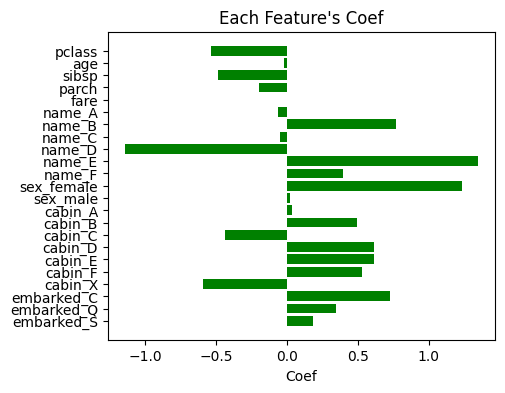

In [89]:
#피처별 영향력을 그래프로 출력하기
import numpy as np
import matplotlib.pyplot as plt
cols = df_train.columns.tolist()
cols.remove("survived")
x_pos = np.arange(len(cols))
plt.rcParams["figure.figsize"]=[5,4]
fig,ax = plt.subplots()
ax.barh(x_pos,lr.coef_[0],
        align="center",color="green",ecolor="black")
ax.set_yticks(x_pos)
ax.set_yticks(x_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel("Coef")
ax.set_title("Each Feature's Coef")
plt.show()
